# 📘 Options Trade Data Analysis
This notebook explores a dataset of options trades, performing initial data inspection and Exploratory Data Analysis (EDA).

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('optionsTradeData_updated.csv')

# Convert date columns
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['ExpirationDate'] = pd.to_datetime(df['ExpirationDate'], errors='coerce')

# Convert PnL to category
df['pnl'] = df['pnl'].astype('category')

## 🔍 Data Overview & Summary

In [11]:
# Basic info
print(df.info())
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62795 entries, 0 to 62794
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OptionType      62795 non-null  object        
 1   Time            62795 non-null  object        
 2   Sym             62795 non-null  object        
 3   Expiration      62795 non-null  object        
 4   Strike          62795 non-null  float64       
 5   StockPrice      62795 non-null  float64       
 6   Date            62795 non-null  datetime64[ns]
 7   Spent           62795 non-null  int64         
 8   Sector          62795 non-null  object        
 9   ExpirationDate  62783 non-null  datetime64[ns]
 10  ChainLocation   62795 non-null  object        
 11  pnl             62795 non-null  category      
 12  HasKnowledge    62795 non-null  bool          
dtypes: bool(1), category(1), datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 5.4+ MB
None


,OptionType,Time,Sym,Expiration,Strike,StockPrice,Date,Spent,Sector,ExpirationDate,ChainLocation,pnl,HasKnowledge
count,62795,62795,62795,62795,62795.000000,62795.000000,62795,6.279500e+04,62795,62783,62795,62795,62795
unique,2,3600,2346,256,NaN,NaN,NaN,NaN,19,NaN,3,2,2
top,call,55:00.0,SPY,01-19 M,NaN,NaN,NaN,NaN,Technology,NaN,OTM,Loss,True
freq,43046,176,4455,2622,NaN,NaN,NaN,NaN,14282,NaN,51816,56102,41257
mean,NaN,NaN,NaN,NaN,74.799344,73.883169,2018-10-28 04:08:55.456644608,2.262895e+05,NaN,2018-12-19 10:57:01.728812032,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.500000,0.000000,2017-11-13 00:00:00,4.000000e+03,NaN,2017-11-15 00:00:00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,21.500000,20.950000,2018-06-01 00:00:00,3.600000e+04,NaN,2018-07-20 00:00:00,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,41.000000,40.790000,2018-11-08 00:00:00,8.200000e+04,NaN,2018-12-21 00:00:00,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,93.000000,92.195000,2019-04-03 00:00:00,1.980000e+05,NaN,2019-05-17 00:00:00,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,2140.000000,1939.210000,2019-08-09 00:00:00,1.591710e+08,NaN,2021-12-17 00:00:00,NaN,NaN,NaN


## 📉 Missing Values

In [12]:
# Missing values
df.isnull().sum()

OptionType         0
Time               0
Sym                0
Expiration         0
Strike             0
StockPrice         0
Date               0
Spent              0
Sector             0
ExpirationDate    12
ChainLocation      0
pnl                0
HasKnowledge       0
dtype: int64

## 🎯 PnL (Target Variable) Distribution

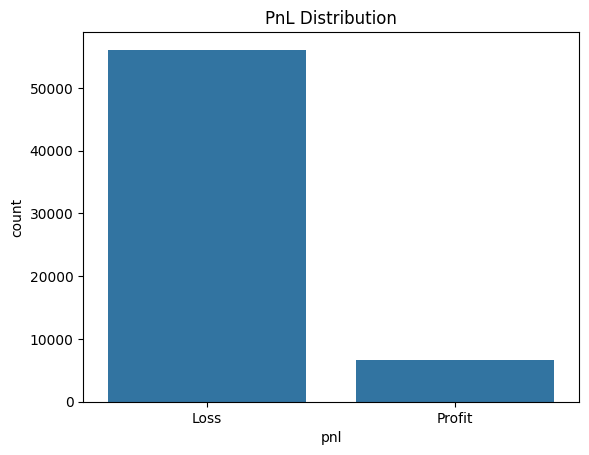

In [13]:
sns.countplot(data=df, x='pnl')
plt.title('PnL Distribution')
plt.show()

## Over 50k trades were in loss throughout the cycle

In [14]:
# Total number of losing trades
total_losing_trades = df[df['pnl'] == 'Loss'].shape[0]
print("Total Losing Trades:", total_losing_trades)


Total Losing Trades: 56102


## 🔗 Chain Location vs PnL

In [15]:
pd.crosstab(df['ChainLocation'], df['pnl'])

pnl,Loss,Profit
ChainLocation,,
ATM,201,0
ITM,4085,6693
OTM,51816,0


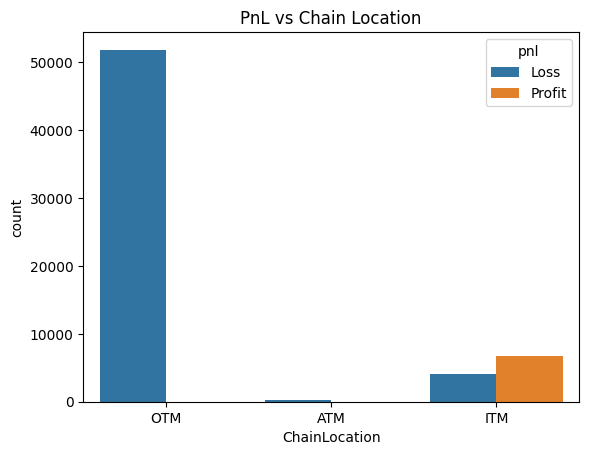

In [17]:
sns.countplot(data=df, x='ChainLocation', hue='pnl')
plt.title('PnL vs Chain Location')
plt.show()

In [18]:
from scipy.stats import chi2_contingency

# Cross-tab of pnl vs ChainLocation
ct = pd.crosstab(df['pnl'], df['ChainLocation'])

# Run Chi-Square Test
chi2, p, dof, expected = chi2_contingency(ct)

print(f"Chi-square statistic: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p}")

if p < 0.05:
    print("✅ Reject the null hypothesis: There IS a relationship between ChainLocation and PnL.")
else:
    print("❌ Fail to reject the null hypothesis: No significant relationship found.")


Chi-square statistic: 36155.52465493937
Degrees of freedom: 2
P-value: 0.0
✅ Reject the null hypothesis: There IS a relationship between ChainLocation and PnL.


We conducted a Chi-Square Test of Independence between ChainLocation and PnL (profit or loss) using OptionsTrade_EDA.ipynb.

Null Hypothesis (H0): There is no relationship between chain location and trade profitability.

Alternative Hypothesis (H1): Chain location influences the probability of profit or loss.

### Result:

P-value: 0.0

Conclusion: Based on the result, we reject the null hypothesis, indicating that chain location also impact trade outcomes.

# We hypothesized that:

“If AI-based decision support are introduced, the proportion of loss-making trades will fall from 12% to 6%.”